In [46]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import netCDF4
%matplotlib inline

In [102]:
sns.set_style('white')
sns.set_context('paper', font_scale=3)
sns.set_palette('hls', 6)
sns.set_style('ticks')

In [48]:
dirname_p25 = "/archive/ogrp/CMIP6/OMIP/warsaw_201803_mom6_2018.04.06"
fname_p25 = dirname_p25+"/OM4p25_IAF_BLING_CFC_csf/gfdl.ncrc4-intel16-prod/pp/ocean_annual_z/av/annual_20yr/ocean_annual_z.1988-2007.ann.nc"

dirname_p5 = "/archive/oar.gfdl.bgrp-account/CMIP6/OMIP/warsaw_201803_mom6_2018.04.11"
fname_p5  = dirname_p5+"/OM4p5_IAF_BLING_CFC_abio_csf_mle200/gfdl.ncrc4-intel16-prod/pp/ocean_annual_z/av/annual_20yr/ocean_annual_z.1988-2007.ann.nc"
fname_p5n = dirname_p5+"/OM4p5_IAF_BLING_CFC_abio_csf_p25config/gfdl.ncrc4-intel16-prod/pp/ocean_annual_z/av/annual_20yr/ocean_annual_z.1988-2007.ann.nc"
#fname_p5n
fname_p5nn = dirname_p5+"/OM4p5_IAF_BLING_CFC_abio_csf_mle500/gfdl.ncrc4-intel16-prod/pp/ocean_annual_z/av/annual_20yr/ocean_annual_z.1988-2007.ann.nc"
#fname_p5n#fname_p5n

In [49]:
ds_p25 = netCDF4.Dataset(fname_p25)
ds_p5  = netCDF4.Dataset(fname_p5)
ds_p5n = netCDF4.Dataset(fname_p5n)
ds_p5nn = netCDF4.Dataset(fname_p5nn)

#for v in ds_p25.variables: print("p25 variable:", v)
#print("")    
#for v in ds_p5.variables: print("p5 variable:", v)

In [50]:
# get i-index for Drake Passage longitude
#drake_lon = -70.0
drake_lon = -69.75

x_p25 = ds_p25.variables['xq']
#x_p25 = ds_p25.variables['xh']

idrake_p25  = (np.fabs(x_p25[:] - drake_lon)).argmin()
#print(x_p25.shape, idrake_p25)

x_p5 = ds_p5.variables['xq']
idrake_p5  = (np.fabs(x_p5[:] - drake_lon)).argmin()

print(x_p25.shape,', ',idrake_p25,', ',x_p5.shape, ', ', idrake_p5,' ',np.ma.is_masked(x_p5))
#print(x_p5)

(1440,) ,  918 ,  (720,) ,  459   False


In [51]:
# get j-indices for Drake Passage latitude bounds 

drake_latS = -75.0
drake_latN = -50.0
#drake_latS = -70.0
#drake_latN = -55.0

y_p25 = ds_p25.variables['yh']
jdrakeS_p25  = (np.fabs(y_p25[:] - drake_latS)).argmin()
jdrakeN_p25  = (np.fabs(y_p25[:] - drake_latN)).argmin()
print(y_p25.shape, ', ', jdrakeS_p25, ', ', jdrakeN_p25)

y_p5 = ds_p5.variables['yh']
jdrakeS_p5  = (np.fabs(y_p5[:] - drake_latS)).argmin()
jdrakeN_p5  = (np.fabs(y_p5[:] - drake_latN)).argmin()
print(y_p5.shape,', ', jdrakeS_p5,', ', jdrakeN_p5)

print(np.ma.is_masked(y_p5))

(1080,) ,  59 ,  271
(576,) ,  16 ,  126
False


In [52]:
# get dyt along Drake Passage longitude from ocean.static 

sname_p25 = "/archive/ogrp/CMIP6/OMIP/warsaw_201803_mom6_2018.04.06/OM4p25_IAF_BLING_CFC_csf/gfdl.ncrc4-intel16-prod/pp/ocean_annual_z/ocean_annual_z.static.nc"
sname_p5  = dirname_p5+"/OM4p5_IAF_BLING_CFC_abio_csf_mle200/gfdl.ncrc4-intel16-prod/pp/ocean_annual_z/ocean_annual_z.static.nc"

static_p25 = netCDF4.Dataset(sname_p25)
static_p5  = netCDF4.Dataset(sname_p5)

#for v in static_p25.variables: print("static_p25 variable:", v)

dy_p25 = static_p25.variables['dyCu'][:,idrake_p25]
dy_p5  = static_p5.variables['dyCu'][:,idrake_p5]

dyinv_p25 = np.reciprocal(dy_p25)
dyinv_p5  = np.reciprocal(dy_p5)

print(dy_p5.shape,', ', dy_p25.shape, ', ',dy_p5[160],', ',dyinv_p5[160])

# p5 should not be masked; that is a bug in p5 output 
print(np.ma.is_masked(dyinv_p5),np.ma.is_masked(dy_p5),np.ma.is_masked(dy_p25),np.ma.is_masked(dy_p25))

(576,) ,  (1080,) ,  44041.96 ,  2.2705619e-05
True True False False


In [53]:
# get full cell thickness information.
# same for all three models  

# vertical position of center 
z_l = ds_p5.variables['z_l']

# vertical position of interfaces
z_i = ds_p5.variables['z_i']

# vertical cell thicknesses 
dz  = z_i[1:] - z_i[:-1]
#dzinv = 1.0/dz
dzinv = np.reciprocal(dz)

#print(dz.shape,', ',dz,', ',dzinv)
np.ma.is_masked(dz)

# cumulative sum 
dz_cumsum = np.cumsum(dz)
print(dz_cumsum.shape[0],', ', dz_cumsum)


35 ,  [5.0 15.0 25.0 40.0 62.5 87.5 112.5 137.5 175.0 225.0 275.0 350.0 450.0
 550.0 650.0 750.0 850.0 950.0 1050.0 1150.0 1250.0 1350.0 1450.0 1625.0
 1875.0 2250.0 2750.0 3250.0 3750.0 4250.0 4750.0 5250.0 5750.0 6250.0
 6750.0]


(1080,) ,  (576,)  ,  (35, 1080) ,  (35, 576)  ,  (35, 1080)
True True
True True


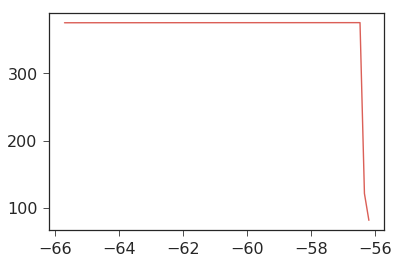

In [54]:
# get partial cell dz = volcello/areacello

area_p25 = static_p25.variables['areacello'][:,idrake_p25]
area_p5  = static_p5.variables['areacello'][:,idrake_p5]

vol_p25 = ds_p25.variables['volcello'][0,:,:,idrake_p25]
vol_p5  = ds_p5.variables['volcello'][0,:,:,idrake_p5]

dz_p25  = vol_p25/area_p25
dz_p5   = vol_p5/area_p5
dzinv_p25 = 1.0/dz_p25
dzinv_p5  = 1.0/dz_p5

print(area_p25.shape,', ',area_p5.shape,' , ', vol_p25.shape,', ',vol_p5.shape,' , ',dz_p25.shape)
print(np.ma.is_masked(dz_p25),np.ma.is_masked(dz_p5))
print(np.ma.is_masked(dzinv_p25),np.ma.is_masked(dzinv_p5))
plt.plot(y_p25[jdrakeS_p25:jdrakeN_p25],dz_p25[25,jdrakeS_p25:jdrakeN_p25])
#plt.plot(yh_p25[jdrakeS_p25:jdrakeN_p25],dzinv_p25[5,jdrakeS_p25:jdrakeN_p25])

In [55]:
# get depth to center of partial cell 

kmax = dz_p25.shape[0]
zl_p25    = 0.0 * dz_p25[:]
zl_p25[0] = 0.5 * dz_p25[0]
k=1
while k < kmax:
    zl_p25[k] = zl_p25[k-1] + 0.5 * (dz_p25[k]+dz_p25[k-1])
    k = k+1  

kmax = dz_p5.shape[0]
zl_p5    = 0.0 * dz_p5[:]
zl_p5[0] = 0.5 * dz_p5[0]
k=1
while k < kmax:
    zl_p5[k] = zl_p5[k-1] + 0.5 * (dz_p5[k]+dz_p5[k-1])
    k = k+1  

# remove masks so that we can use as a coordinate for pcolormesh 
zl_p25_nm = np.array(zl_p25)
zl_p5_nm  = np.array(zl_p5)

print(zl_p25.shape,' ',np.ma.is_masked(zl_p25),' ',zl_p25[:,jdrakeS_p25+100] )    
print(zl_p5.shape,' ',np.ma.is_masked(zl_p5),' ',zl_p5[:,jdrakeS_p5+50] )    
print(zl_p5_nm.shape,' ',np.ma.is_masked(zl_p5_nm),' ',zl_p5_nm[:,jdrakeS_p5+50] )    

(35, 1080)   True   [2.4988250732421875 9.99530029296875 19.9906005859375 32.48472595214844
 51.225914001464844 74.96475219726562 99.9530029296875 124.94125366210938
 156.17657470703125 199.906005859375 249.88250732421875 312.3531494140625
 399.81201171875 499.7650146484375 599.718017578125 699.6710205078125
 799.6240234375 899.5770263671875 999.530029296875 1099.4830322265625
 1199.43603515625 1299.3890380859375 1399.342041015625 1536.7774658203125
 1749.1776123046875 2061.53076171875 2498.8251953125 2998.590087890625
 3253.843505859375 -- -- -- -- -- --]
(35, 576)   True   [2.4985687732696533 9.994275093078613 19.988550186157227 32.48139190673828
 51.22065734863281 74.95706176757812 99.9427490234375 124.92843627929688
 156.16055297851562 199.88551330566406 249.8568878173828
 312.32110595703125 399.7710266113281 499.7137756347656 599.6565551757812
 699.5993041992188 799.5420532226562 899.4848022460938 999.4275512695312
 1099.370361328125 1199.3131103515625 1299.255859375 1399.19860839

True True


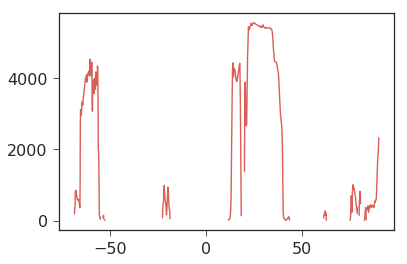

In [56]:
# depth arrays along Drake longitude 

depth_p25 = static_p25.variables['deptho'][:,idrake_p25]
depth_p5  = static_p5.variables['deptho'][:,idrake_p5]

print(np.ma.is_masked(depth_p5),np.ma.is_masked(depth_p25))
plt.plot(y_p25,depth_p25)

False


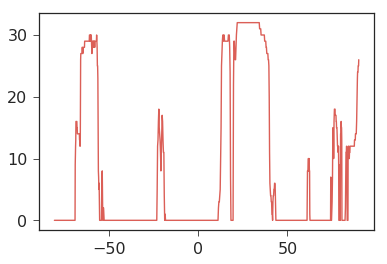

In [57]:
# develop the kmt array for p25

kmt_p25 = np.zeros(depth_p25[:].shape,dtype='int8')
for j in range(kmt_p25.shape[0]):
    kmt_p25[j] = np.fabs(depth_p25[j] - z_l[:]).argmin()
print(np.ma.is_masked(kmt_p25))
plt.plot(y_p25,kmt_p25) 

False


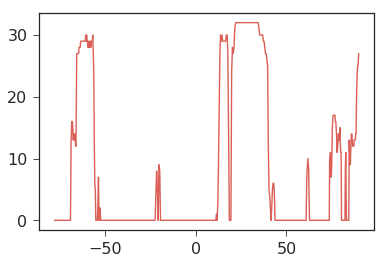

In [58]:
# develop the kmt array for p5 and p5n

kmt_p5 = np.zeros(depth_p5[:].shape,dtype='int8')
for j in range(kmt_p5.shape[0]):
    kmt_p5[j] = np.fabs(depth_p5[j] - z_l[:]).argmin()
print(np.ma.is_masked(kmt_p5))
plt.plot(y_p5,kmt_p5) 

False  , (35, 1080)


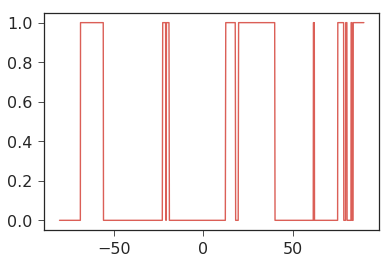

In [59]:
# develop mask for p25 

mask_shape = [z_l.shape[0],depth_p25[:].shape[0]]
mask_p25 = np.zeros(mask_shape, dtype='int8')
#print(mask_shape, mask_p25.shape)

jmax = mask_p25.shape[1]
kmax = mask_p25.shape[0]

j = 0
while j < jmax:
    k = 0
    while k < kmax:
        if k <= kmt_p25[j]: mask_p25[k,j] = 1.0
        k = k+1
    j=j+1 
    
print(np.ma.is_masked(mask_p25),' ,',mask_p25.shape)
plt.plot(y_p25,mask_p25[10,:]) 

False  , (35, 576)


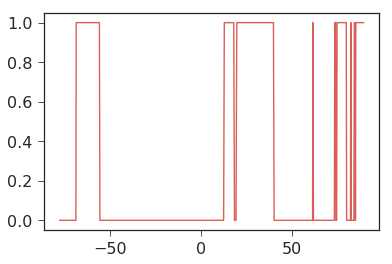

In [60]:
# develop mask for p5 and p5n and p5nn

mask_shape = [z_l.shape[0],depth_p5[:].shape[0]]
mask_p5 = np.zeros(mask_shape, dtype='int8')
#print(mask_shape, mask_p5.shape)

jmax = mask_p5.shape[1]
kmax = mask_p5.shape[0]

j = 0
while j < jmax:
    k = 0
    while k < kmax:
        if k <= kmt_p5[j]: mask_p5[k,j] = 1.0
        k = k+1
    j=j+1 
    
print(np.ma.is_masked(mask_p5),' ,',mask_p5.shape)
plt.plot(y_p5,mask_p5[10,:]) 

In [61]:
# produce ures_p25 (residual mean velocity) from uh*dzinv*dytinv. 

uh = ds_p25.variables['uh'][:,:,:,:]
uh = np.squeeze(uh,axis=0)
uh_p25 = uh[:,:,idrake_p25]
#print(uh_p25.shape,', ', uh.shape,', ',idrake_p25)

ures_p25 = 0.0 * uh_p25   # to inherit masking/nans  
jmax = ures_p25.shape[0]
k=0
while k < 35:
    ures_p25[k,:] = uh_p25[k,:] * dyinv_p25[:] * dzinv_p25[k,:] 
    k = k + 1
    
#ures_p25[k,:] = uh_p25[k,:] * dyinv_p25[:] * dzinv[k]    
print(np.ma.is_masked(uh_p25),np.ma.is_masked(ures_p25))
#ures_p25 = np.ma.masked_greater(ures_p25, 1e5)
#ures_p25 = np.ma.filled(ures_p25, 0.0)
#plt.pcolormesh(y_p25,z_l,ures_p25)
#print(ures_p25[29,199])

True True


In [62]:
# produce ures_p5 

uh = ds_p5.variables['uh']
uh = np.squeeze(uh,axis=0)
uh_p5 = uh[:,:,idrake_p5]
uh_p5 = np.ma.masked_greater(uh_p5, 1e10)   # should be masked; unsure why it is not  already 

ures_p5 = 0.0 * uh_p5    # to inherit masking/nans  
k=0
while k < 35:
    ures_p5[k,:] = uh_p5[k,:] * dyinv_p5[:] * dzinv_p5[k,:] * mask_p5[k,:]
    k = k + 1

#ures_p5[k,:] = uh_p5[k,:] * dyinv_p5[:] * dzinv[k] * mask_p5[k,:]   
print(np.ma.is_masked(uh_p5),np.ma.is_masked(ures_p5))       
#plt.pcolormesh(y_p5,z_l,ures_p5)   
#print(ures_p5.shape), print(dzinv), print(ures_p5)

True True


In [63]:
# produce ures_p5n 

uh = ds_p5n.variables['uh']
uh = np.squeeze(uh,axis=0)
uh_p5n = uh[:,:,idrake_p5]
uh_p5n = np.ma.masked_greater(uh_p5n, 1e10)   # should be masked; unsure why it is not  already 

ures_p5n = 0.0 * uh_p5n    # to inherit masking/nans  
k=0
while k < 35:
    ures_p5n[k,:] = uh_p5n[k,:] * dyinv_p5[:] * dzinv_p5[k,:] * mask_p5[k,:]
    k = k + 1

# ures_p5n[k,:] = uh_p5n[k,:] * dyinv_p5[:] * dzinv[k] * mask_p5[k,:]   
print(np.ma.is_masked(uh_p5n),np.ma.is_masked(ures_p5n))       
#plt.pcolormesh(y_p5,z_l,ures_p5)   
#print(ures_p5.shape), print(dzinv), print(ures_p5)

True True


In [64]:
# produce ures_p5nn 

uh = ds_p5nn.variables['uh']
uh = np.squeeze(uh,axis=0)
uh_p5nn = uh[:,:,idrake_p5]
uh_p5nn = np.ma.masked_greater(uh_p5nn, 1e10)   # should be masked; unsure why it is not  already 

ures_p5nn = 0.0 * uh_p5nn    # to inherit masking/nans  
k=0
while k < 35:
    ures_p5nn[k,:] = uh_p5nn[k,:] * dyinv_p5[:] * dzinv_p5[k,:] * mask_p5[k,:]
    k = k + 1

# ures_p5n[k,:] = uh_p5n[k,:] * dyinv_p5[:] * dzinv[k] * mask_p5[k,:]   
print(np.ma.is_masked(uh_p5nn),np.ma.is_masked(ures_p5n))       
#plt.pcolormesh(y_p5,z_l,ures_p5)   
#print(ures_p5.shape), print(dzinv), print(ures_p5)

True True


(1080,) , uresbot_p25 =  0.032287676 ,  True  ,  False


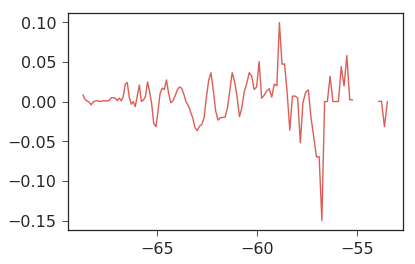

In [65]:
# get ures_p25 at ocean bottom

uresbot_p25 = 0.0 * ures_p25[0,:]
j=jdrakeS_p25
while j <= jdrakeN_p25:
    k = kmt_p25[j]
    uresbot_p25[j] = ures_p25[k,j]
    j=j+1 
    
print(uresbot_p25.shape,', uresbot_p25 = ',uresbot_p25[199],', ',np.ma.is_masked(uresbot_p25),' , ',np.ma.is_masked(kmt_p25))
plt.plot(y_p25[100:250],uresbot_p25[100:250])
#plt.plot(yh_p25[200:250],kmt_p25[200:250])

(576,) , uresbot_p5 =  0.0032874667 ,  True


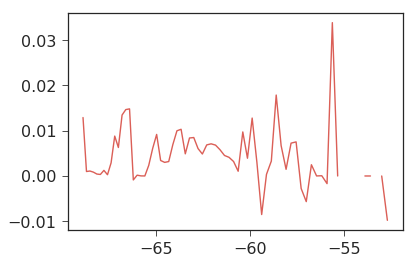

In [66]:
# get ures_p5 at ocean bottom

uresbot_p5 = 0.0 * ures_p5[0,:]
j=jdrakeS_p5
while j <= jdrakeN_p5:
    k = kmt_p5[j]
    uresbot_p5[j] = ures_p5[k,j]
    j=j+1 
    
print(uresbot_p5.shape,', uresbot_p5 = ',uresbot_p5[95],', ',np.ma.is_masked(uresbot_p5))
#print(uresbot_p5.shape,', uresbot_p5 = ',uresbot_p5[95],', ',np.ma.is_masked(uresbot_p5), uresbot_p5[jdrakeS_p5:jdrakeN_p5])
plt.plot(y_p5[0:125],uresbot_p5[0:125])

(576,) , uresbot_p5n =  0.011648553 ,  True


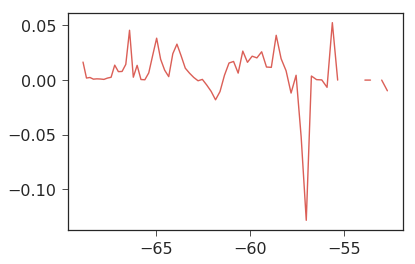

In [67]:
# get ures_p5n at ocean bottom

uresbot_p5n = 0.0 * ures_p5n[0,:]
j=jdrakeS_p5
while j <= jdrakeN_p5:
    k = kmt_p5[j]
    uresbot_p5n[j] = ures_p5n[k,j]
    j=j+1 
    
print(uresbot_p5n.shape,', uresbot_p5n = ',uresbot_p5n[95],', ',np.ma.is_masked(uresbot_p5n))
plt.plot(y_p5[0:125],uresbot_p5n[0:125])

(576,) , uresbot_p5nn =  0.003444776 ,  True


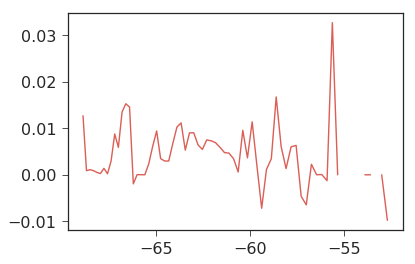

In [68]:
# get ures_p5n at ocean bottom

uresbot_p5nn = 0.0 * ures_p5nn[0,:]
j=jdrakeS_p5
while j <= jdrakeN_p5:
    k = kmt_p5[j]
    uresbot_p5nn[j] = ures_p5nn[k,j]
    j=j+1 
    
print(uresbot_p5nn.shape,', uresbot_p5nn = ',uresbot_p5nn[95],', ',np.ma.is_masked(uresbot_p5nn))
plt.plot(y_p5[0:125],uresbot_p5nn[0:125])

In [69]:
# compute mean uresbot_p25 across Drake Passage     
field  = uresbot_p25[:]*dy_p25[:]
dy_tot = np.ma.sum(dy_p25[jdrakeS_p25:jdrakeN_p25])
uresbot_mean_p25 = np.ma.sum(field[jdrakeS_p25:jdrakeN_p25])/dy_tot
print(uresbot_mean_p25,', ',np.ma.is_masked(uresbot_p25), ', ',np.ma.is_masked(uresbot_mean_p25))

0.0012251068 ,  True ,  False


In [70]:
# compute mean uresbot_p5 across Drake Passage     
field  = uresbot_p5[:]*dy_p5[:]
dy_tot = np.ma.sum(dy_p5[jdrakeS_p5:jdrakeN_p5])
uresbot_mean_p5 = np.ma.sum(field[jdrakeS_p5:jdrakeN_p5])/dy_tot
print(uresbot_mean_p5,', ',np.ma.is_masked(uresbot_p5), ', ',np.ma.is_masked(uresbot_mean_p5))

0.0026061314 ,  True ,  False


In [71]:
# compute mean uresbot_p5n across Drake Passage     
field  = uresbot_p5n[:]*dy_p5[:]
dy_tot = np.ma.sum(dy_p5[jdrakeS_p5:jdrakeN_p5])
uresbot_mean_p5n = np.ma.sum(field[jdrakeS_p5:jdrakeN_p5])/dy_tot
print(uresbot_mean_p5n,', ',np.ma.is_masked(uresbot_p5n), ', ',np.ma.is_masked(uresbot_mean_p5n))

0.0032712154 ,  True ,  False


In [72]:
# compute mean uresbot_p5nn across Drake Passage     
field  = uresbot_p5nn[:]*dy_p5[:]
dy_tot = np.ma.sum(dy_p5[jdrakeS_p5:jdrakeN_p5])
uresbot_mean_p5nn = np.ma.sum(field[jdrakeS_p5:jdrakeN_p5])/dy_tot
print(uresbot_mean_p5nn,', ',np.ma.is_masked(uresbot_p5nn), ', ',np.ma.is_masked(uresbot_mean_p5nn))

0.0025542364 ,  True ,  False


1080 True True
+++++ (1080,)   ()   True
1.2838697   (212,)   (212,)


<Figure size 720x360 with 0 Axes>

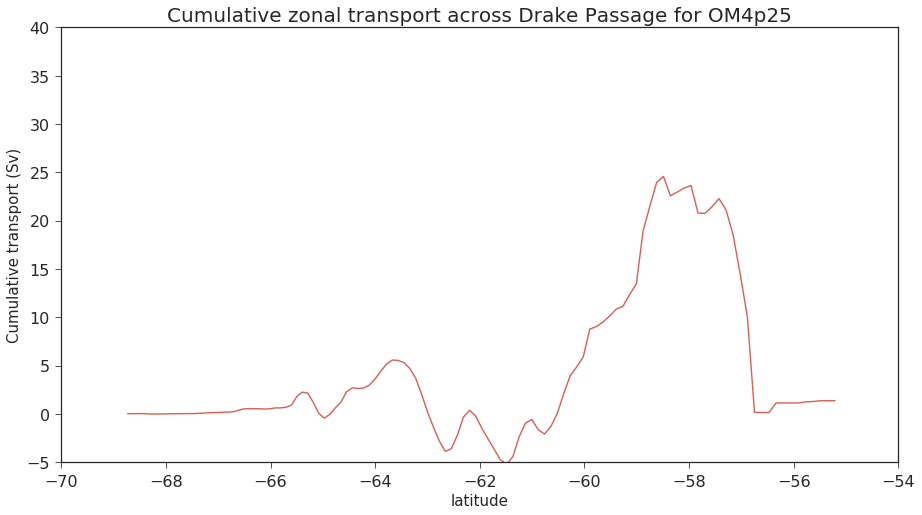

In [73]:
area_drake_p25 = 0.0 * uresbot_p25
ures_bt_p25    = 0.0 * uresbot_p25
print(area_drake_p25.shape[0], np.ma.is_masked(area_drake_p25),np.ma.is_masked(ures_bt_p25))

jmax = area_drake_p25.shape[0]
kmax = dz.shape[0]
j=0
#while j < jmax:
#    k=0
#    while k < kmax:
#        area_drake_p25[j] = area_drake_p25[j] + mask_p25[k,j] * dy_p25[j] * dz[k] 
#        k=k+1
#    ures_bt_p25[j] = 1e-6 * uresbot_p25[j] * area_drake_p25[j]   
#    j=j+1
    
while j < jmax:
    area_drake_p25[j] = dy_p25[j] * depth_p25[j]
    ures_bt_p25[j] = 1e-6 * uresbot_p25[j] * area_drake_p25[j]   
    j=j+1
    

ures_bt_drake_p25 = np.sum(ures_bt_p25[jdrakeS_p25:jdrakeN_p25])
print('+++++',ures_bt_p25.shape, ' ',ures_bt_drake_p25.shape,' ',np.ma.is_masked(ures_bt_p25))    

ures_bt_drake_cumsum_p25 = np.cumsum(ures_bt_p25[jdrakeS_p25:jdrakeN_p25])
#plt.plot(y_p25[0:300],area_drake_p25[0:300])
print(ures_bt_drake_p25,' ',ures_bt_p25[jdrakeS_p25:jdrakeN_p25].shape,' ',ures_bt_drake_cumsum_p25.shape)
#plt.plot(y_p25[jdrakeS_p25:jdrakeN_p25],ures_bt_p25[jdrakeS_p25:jdrakeN_p25]) 


plt.figure(figsize=(10, 5)) 
fig, axis = plt.subplots(1,1, figsize=(15,8))
plt.plot(y_p25[jdrakeS_p25:jdrakeN_p25],ures_bt_drake_cumsum_p25) 
plt.ylim((-5,40))
plt.xlim((-70,-54))
axis.set_ylabel("Cumulative transport (Sv)",fontsize=15)
axis.set_xlabel("latitude",fontsize=15)
axis.set_title("Cumulative zonal transport across Drake Passage for OM4p25",fontsize=20)
fig.savefig('./figures/ures_mean_cumsum_Drake_OM4p25.png', bbox_inches='tight', dpi=300)

+++++ (576,)   ()   True
19.62711   (110,)   (110,)


<Figure size 720x360 with 0 Axes>

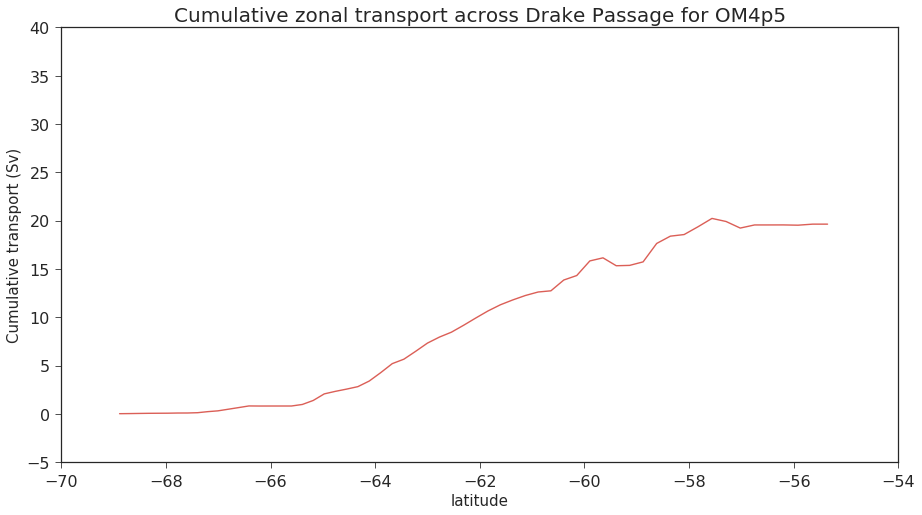

In [74]:
area_drake_p5 = 0.0 * dy_p5
ures_bt_p5    = 0.0 * dy_p5
#print(area_drake_p5.shape[0], np.ma.is_masked(area_drake_p5),np.ma.is_masked(ures_bt_p5), area_drake_p5[jdrakeS_p5:jdrakeN_p5])

jmax = area_drake_p5.shape[0]
kmax = dz.shape[0]
j=0
while j < jmax:
    area_drake_p5[j] = dy_p5[j] * depth_p5[j]
    ures_bt_p5[j] = 1e-6 * uresbot_p5[j] * area_drake_p5[j]   
    j=j+1
        
#    k=0
#    while k < kmax:
#        area_drake_p5[j] = area_drake_p5[j] + mask_p5[k,j] * dy_p5[j] * dz[k] 
#        k=k+1
#    ures_bt_p5[j] = 1e-6 * uresbot_p5[j] * area_drake_p5[j]   
#    j=j+1

ures_bt_drake_p5 = np.sum(ures_bt_p5[jdrakeS_p5:jdrakeN_p5])
print('+++++',ures_bt_p5.shape, ' ',ures_bt_drake_p5.shape,' ',np.ma.is_masked(ures_bt_p5))    

ures_bt_drake_cumsum_p5 = np.cumsum(ures_bt_p5[jdrakeS_p5:jdrakeN_p5])
print(ures_bt_drake_p5,' ',ures_bt_p5[jdrakeS_p5:jdrakeN_p5].shape,' ',ures_bt_drake_cumsum_p5.shape)
#plt.plot(yh_p5[jdrakeS_p5:jdrakeN_p5],ures_bt_p5[jdrakeS_p5:jdrakeN_p5]) 
#plt.plot(yh_p5[jdrakeS_p5:jdrakeN_p5],area_drake_p5[jdrakeS_p5:jdrakeN_p5]) 
#plt.plot(yh_p5[jdrakeS_p5:jdrakeN_p5]) 
#plt.plot(yh_p5[jdrakeS_p5:jdrakeN_p5],mask_p5[29,jdrakeS_p5:jdrakeN_p5]) 
#print(area_drake_p5[jdrakeS_p5:jdrakeN_p5])
#print(uresbot_p5[jdrakeS_p5:jdrakeN_p5])

plt.figure(figsize=(10, 5)) 
fig, axis = plt.subplots(1,1, figsize=(15,8))
plt.plot(y_p5[jdrakeS_p5:jdrakeN_p5],ures_bt_drake_cumsum_p5) 
#plt.plot(yh_p5[jdrakeS_p5:jdrakeN_p5],ures_bt_p5[jdrakeS_p5:jdrakeN_p5]) 
plt.ylim((-5,40))
plt.xlim((-70,-54))
axis.set_ylabel("Cumulative transport (Sv)",fontsize=15)
axis.set_xlabel("latitude",fontsize=15)
axis.set_title("Cumulative zonal transport across Drake Passage for OM4p5",fontsize=20)
fig.savefig('./figures/ures_mean_cumsum_Drake_OM4p5.png', bbox_inches='tight', dpi=300)

576 True True
+++++ (576,)   ()   True
19.23476   (110,)   (110,)


<Figure size 720x360 with 0 Axes>

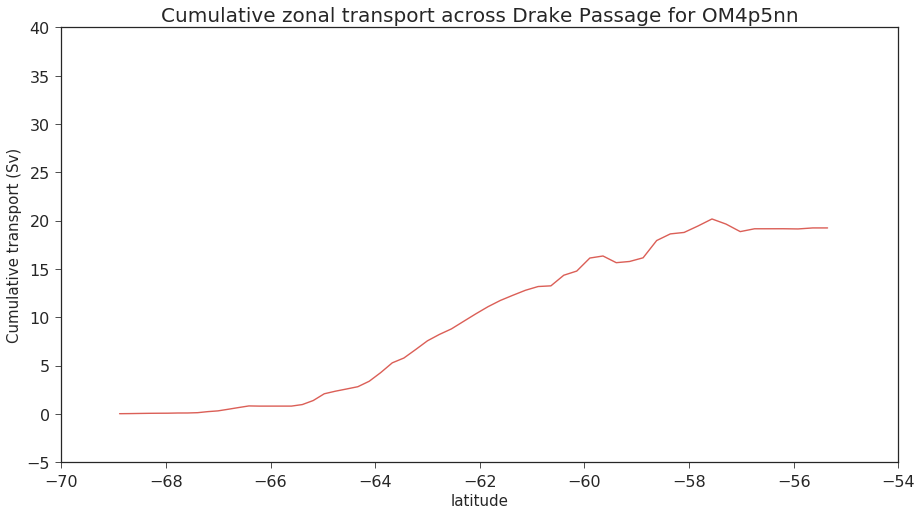

In [75]:
area_drake_p5nn = 0.0 * uresbot_p5nn
ures_bt_p5nn    = 0.0 * uresbot_p5nn
print(area_drake_p5nn.shape[0], np.ma.is_masked(area_drake_p5nn),np.ma.is_masked(ures_bt_p5nn))

jmax = area_drake_p5nn.shape[0]
kmax = dz.shape[0]
j=0
while j < jmax:
    area_drake_p5nn[j] = dy_p5[j] * depth_p5[j]
    ures_bt_p5nn[j] = 1e-6 * uresbot_p5nn[j] * area_drake_p5[j]   
    j=j+1

#    k=0
#    while k < kmax:
#        area_drake_p5n[j] = area_drake_p5n[j] + mask_p5[k,j] * dy_p5[j] * dz[k] 
#        k=k+1
#    ures_bt_p5n[j] = 1e-6 * uresbot_p5n[j] * area_drake_p5n[j]   
#    j=j+1

#print(area_drake_p5n[jdrakeS_p5:jdrakeN_p5])
    
ures_bt_drake_p5nn = np.sum(ures_bt_p5nn[jdrakeS_p5:jdrakeN_p5])
print('+++++',ures_bt_p5nn.shape, ' ',ures_bt_drake_p5nn.shape,' ',np.ma.is_masked(ures_bt_p5nn))    

ures_bt_drake_cumsum_p5nn = np.cumsum(ures_bt_p5nn[jdrakeS_p5:jdrakeN_p5])
print(ures_bt_drake_p5nn,' ',ures_bt_p5nn[jdrakeS_p5:jdrakeN_p5].shape,' ',ures_bt_drake_cumsum_p5nn.shape)
#plt.plot(yh_p5[jdrakeS_p5:jdrakeN_p5],ures_bt_p5n[jdrakeS_p5:jdrakeN_p5]) 


plt.figure(figsize=(10, 5)) 
fig, axis = plt.subplots(1,1, figsize=(15,8))
plt.plot(y_p5[jdrakeS_p5:jdrakeN_p5],ures_bt_drake_cumsum_p5nn) 
plt.ylim((-5,40))
plt.xlim((-70,-54))
axis.set_ylabel("Cumulative transport (Sv)",fontsize=15)
axis.set_xlabel("latitude",fontsize=15)
axis.set_title("Cumulative zonal transport across Drake Passage for OM4p5nn",fontsize=20)
fig.savefig('./figures/ures_mean_cumsum_Drake_OM4p5nn.png', bbox_inches='tight', dpi=300)



576 True True
+++++ (576,)   ()   True
18.360102   (110,)   (110,)


<Figure size 720x360 with 0 Axes>

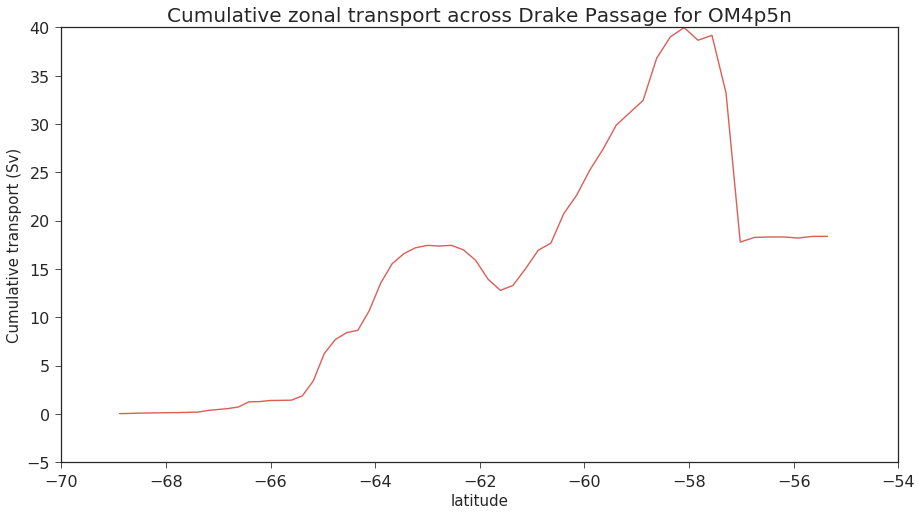

In [76]:
area_drake_p5n = 0.0 * uresbot_p5n
ures_bt_p5n    = 0.0 * uresbot_p5n
print(area_drake_p5n.shape[0], np.ma.is_masked(area_drake_p5n),np.ma.is_masked(ures_bt_p5n))

jmax = area_drake_p5n.shape[0]
kmax = dz.shape[0]
j=0
while j < jmax:
    area_drake_p5n[j] = dy_p5[j] * depth_p5[j]
    ures_bt_p5n[j] = 1e-6 * uresbot_p5n[j] * area_drake_p5[j]   
    j=j+1

#    k=0
#    while k < kmax:
#        area_drake_p5n[j] = area_drake_p5n[j] + mask_p5[k,j] * dy_p5[j] * dz[k] 
#        k=k+1
#    ures_bt_p5n[j] = 1e-6 * uresbot_p5n[j] * area_drake_p5n[j]   
#    j=j+1

#print(area_drake_p5n[jdrakeS_p5:jdrakeN_p5])
    
ures_bt_drake_p5n = np.sum(ures_bt_p5n[jdrakeS_p5:jdrakeN_p5])
print('+++++',ures_bt_p5n.shape, ' ',ures_bt_drake_p5n.shape,' ',np.ma.is_masked(ures_bt_p5n))    

ures_bt_drake_cumsum_p5n = np.cumsum(ures_bt_p5n[jdrakeS_p5:jdrakeN_p5])
print(ures_bt_drake_p5n,' ',ures_bt_p5n[jdrakeS_p5:jdrakeN_p5].shape,' ',ures_bt_drake_cumsum_p5n.shape)
#plt.plot(yh_p5[jdrakeS_p5:jdrakeN_p5],ures_bt_p5n[jdrakeS_p5:jdrakeN_p5]) 


plt.figure(figsize=(10, 5)) 
fig, axis = plt.subplots(1,1, figsize=(15,8))
plt.plot(y_p5[jdrakeS_p5:jdrakeN_p5],ures_bt_drake_cumsum_p5n) 
plt.ylim((-5,40))
plt.xlim((-70,-54))
axis.set_ylabel("Cumulative transport (Sv)",fontsize=15)
axis.set_xlabel("latitude",fontsize=15)
axis.set_title("Cumulative zonal transport across Drake Passage for OM4p5n",fontsize=20)
fig.savefig('./figures/ures_mean_cumsum_Drake_OM4p5n.png', bbox_inches='tight', dpi=300)



<Figure size 720x360 with 0 Axes>

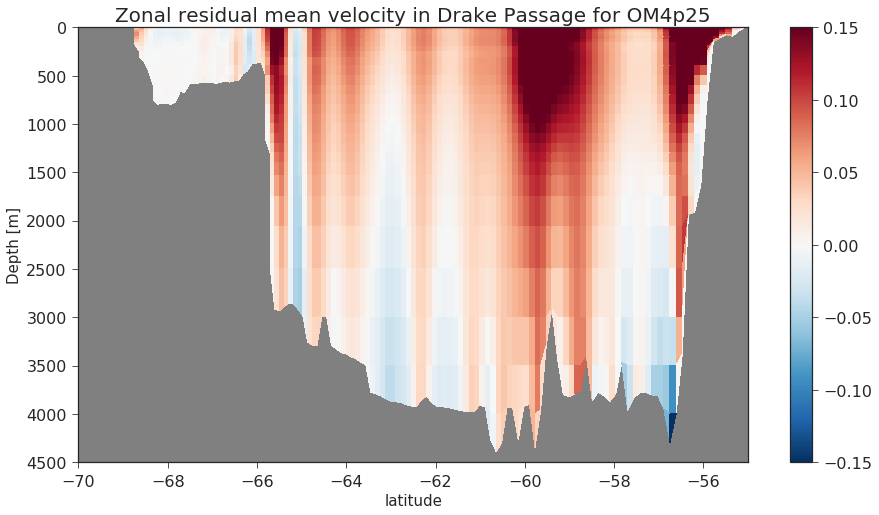

In [77]:
plt.figure(figsize=(10, 5)) 
fig, axis = plt.subplots(1,1, figsize=(15,8))

levels = [-.24, -.22, -.20, -.18, -.16, -.14, -.12, -.10, -.08, -.06, 0, .02, .04, .06, .08, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4]
#levels = [-.25, -.2, -.15, -.1, 0, .1, .15, .2, .25]
field = ures_p25
#plt.contour(yh_p25[:],z_l[:],field[:,:],20,colors='k', levels=levels)
#plt.pcolormesh(yh_p25,z_l,field,cmap='RdBu_r',linewidths=0.25,vmin=-.10,vmax=.10)
plt.pcolormesh(y_p25,zl_p25_nm,field,cmap='RdBu_r',linewidths=0.25,vmin=-.15,vmax=.15)
#plt.contourf(yh_p25[:],zl_p25_nm[:],field[:,:],20,colors='k')
#

plt.ylim((0,4500))
plt.xlim((-70,-55))
#plt.ylim((0,5000))

plt.colorbar()

plt.gca().invert_yaxis()
axis.set_ylabel("Depth [m]",fontsize=15)
axis.set_xlabel("latitude",fontsize=15)
axis.set_facecolor('gray')
#axis.set_facecolor('black')
axis.set_title("Zonal residual mean velocity in Drake Passage for OM4p25",fontsize=20)

fig.savefig('./figures/ures_mean_Drake_OM4p25.png', bbox_inches='tight', dpi=300)

<Figure size 720x360 with 0 Axes>

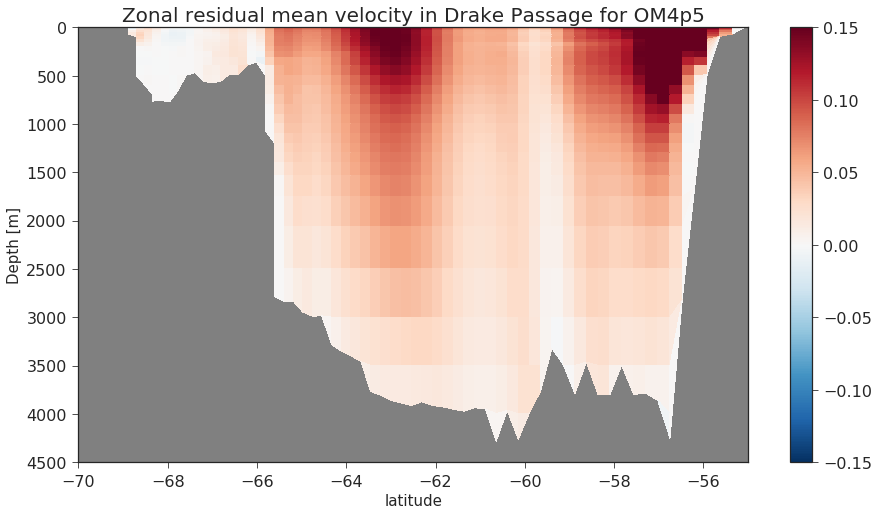

In [78]:
plt.figure(figsize=(10, 5)) 
fig, axis = plt.subplots(1,1, figsize=(15,8))

levels = [-.24, -.22, -.20, -.18, -.16, -.14, -.12, -.10, -.08, -.06, 0, .02, .04, .06, .08, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4]
field = np.ma.masked_greater(ures_p5,1e10)
#plt.contour(y_p5[:],z_l[:],field[:,:],20,colors='k',levels=levels)
#plt.pcolormesh(y_p5,z_l,field,cmap='RdBu_r',linewidths=0.25,vmin=-.10,vmax=.10)
plt.pcolormesh(y_p5,zl_p5_nm,field,cmap='RdBu_r',linewidths=0.25,vmin=-.15,vmax=.15)

plt.ylim((0,4500))
#plt.xlim((-69,-55))
plt.xlim((-70,-55))
plt.colorbar()

plt.gca().invert_yaxis()
axis.set_ylabel("Depth [m]",fontsize=15)
axis.set_xlabel("latitude",fontsize=15)
axis.set_facecolor('gray')
#axis.set_facecolor('black')
axis.set_title("Zonal residual mean velocity in Drake Passage for OM4p5",fontsize=20)

fig.savefig('./figures/ures_mean_Drake_OM4p5.png', bbox_inches='tight', dpi=300)

<Figure size 720x360 with 0 Axes>

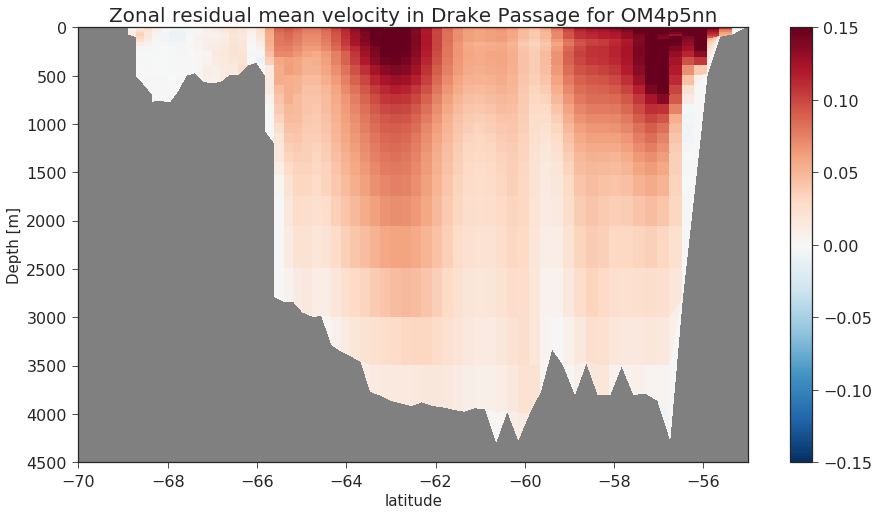

In [79]:
plt.figure(figsize=(10, 5)) 
fig, axis = plt.subplots(1,1, figsize=(15,8))

levels = [-.24, -.22, -.20, -.18, -.16, -.14, -.12, -.10, -.08, -.06, 0, .02, .04, .06, .08, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4]
field = np.ma.masked_greater(ures_p5nn,1e10)
#plt.contour(y_p5[:],z_l[:],field[:,:],20,colors='k',levels=levels)
#plt.pcolormesh(y_p5,z_l,field,cmap='RdBu_r',linewidths=0.25,vmin=-.10,vmax=.10)
plt.pcolormesh(y_p5,zl_p5_nm,field,cmap='RdBu_r',linewidths=0.25,vmin=-.15,vmax=.15)

plt.ylim((0,4500))
#plt.xlim((-69,-55))
plt.xlim((-70,-55))
plt.colorbar()

plt.gca().invert_yaxis()
axis.set_ylabel("Depth [m]",fontsize=15)
axis.set_xlabel("latitude",fontsize=15)
axis.set_facecolor('gray')
axis.set_title("Zonal residual mean velocity in Drake Passage for OM4p5nn",fontsize=20)

fig.savefig('./figures/ures_mean_Drake_OM4p5nn.png', bbox_inches='tight', dpi=300)

<Figure size 720x360 with 0 Axes>

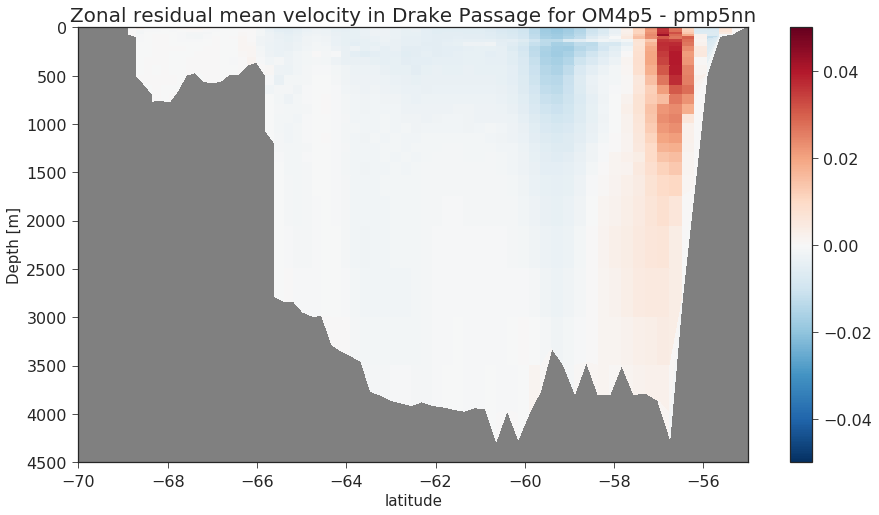

In [80]:
plt.figure(figsize=(10, 5)) 
fig, axis = plt.subplots(1,1, figsize=(15,8))

levels = [-.24, -.22, -.20, -.18, -.16, -.14, -.12, -.10, -.08, -.06, 0, .02, .04, .06, .08, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4]
field = np.ma.masked_greater(ures_p5,1e10) - np.ma.masked_greater(ures_p5nn,1e10) 
#plt.contour(y_p5[:],z_l[:],field[:,:],20,colors='k',levels=levels)
#plt.pcolormesh(y_p5,z_l,field,cmap='RdBu_r',linewidths=0.25,vmin=-.10,vmax=.10)
plt.pcolormesh(y_p5,zl_p5_nm,field,cmap='RdBu_r',linewidths=0.25,vmin=-.05,vmax=.05)

plt.ylim((0,4500))
#plt.xlim((-69,-55))
plt.xlim((-70,-55))
plt.colorbar()

plt.gca().invert_yaxis()
axis.set_ylabel("Depth [m]",fontsize=15)
axis.set_xlabel("latitude",fontsize=15)
axis.set_facecolor('gray')
axis.set_title("Zonal residual mean velocity in Drake Passage for OM4p5 - pmp5nn",fontsize=20)

fig.savefig('./figures/ures_mean_Drake_OM4p5_diff.png', bbox_inches='tight', dpi=300)

<Figure size 720x360 with 0 Axes>

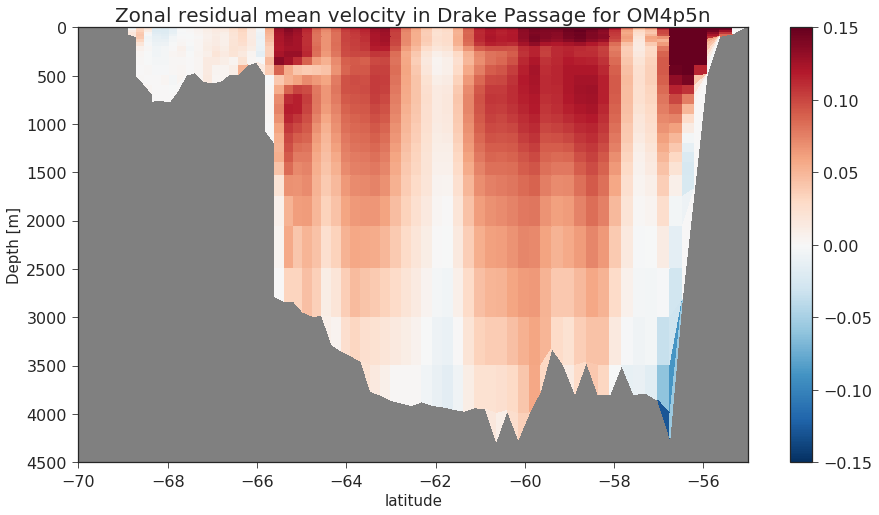

In [81]:
plt.figure(figsize=(10, 5)) 
fig, axis = plt.subplots(1,1, figsize=(15,8))

levels = [-.24, -.22, -.20, -.18, -.16, -.14, -.12, -.10, -.08, -.06, 0, .02, .04, .06, .08, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4]
field = np.ma.masked_greater(ures_p5n,1e10)
#plt.contour(y_p5[:],z_l[:],field[:,:],20,colors='k',levels=levels)
#plt.pcolormesh(y_p5,z_l,field,cmap='RdBu_r',linewidths=0.25,vmin=-.10,vmax=.10)
plt.pcolormesh(y_p5,zl_p5_nm,field,cmap='RdBu_r',linewidths=0.25,vmin=-.15,vmax=.15)

plt.ylim((0,4500))
#plt.xlim((-69,-55))
plt.xlim((-70,-55))
plt.colorbar()

plt.gca().invert_yaxis()
axis.set_ylabel("Depth [m]",fontsize=15)
axis.set_xlabel("latitude",fontsize=15)
axis.set_facecolor('gray')
axis.set_title("Zonal residual mean velocity in Drake Passage for OM4p5n",fontsize=20)

fig.savefig('./figures/ures_mean_Drake_OM4p5n.png', bbox_inches='tight', dpi=300)

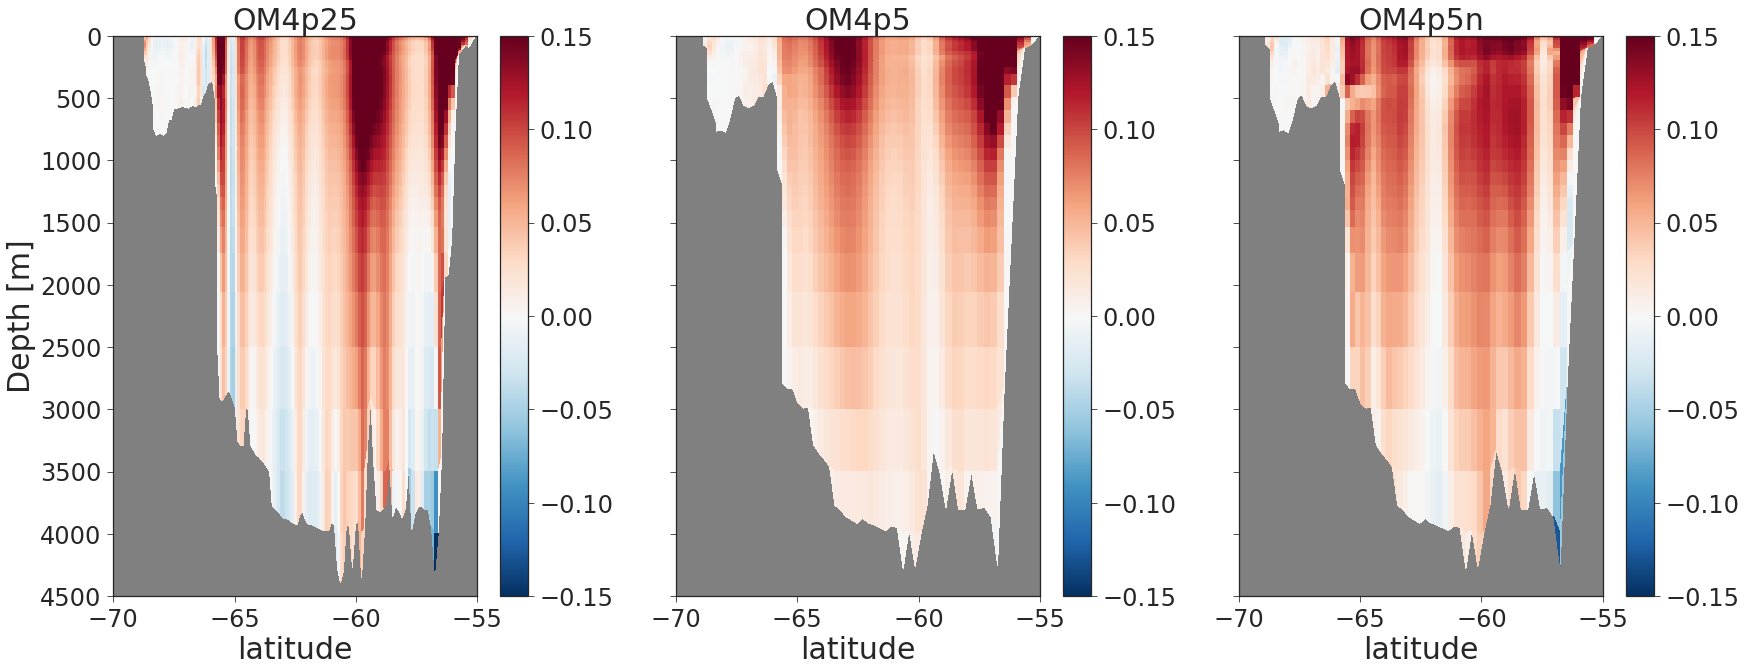

In [116]:
plt.figure(figsize=(25,10)) 

vmin=-.15
vmax=.15

plt.subplot(1,3,1)
field = np.ma.masked_greater(ures_p25,1e10)
plt.pcolormesh(y_p25,zl_p25_nm,field,cmap='RdBu_r',linewidths=0.25,vmin=vmin,vmax=vmax)
plt.ylim((0,4500))
plt.xlim((-70,-55))
plt.colorbar()
plt.gca().invert_yaxis()
plt.ylabel("Depth [m]",fontsize=30)
plt.xlabel("latitude",fontsize=30)
plt.title("OM4p25",fontsize=30)
plt.gca().set_facecolor('gray')

plt.subplot(1,3,2)
field = np.ma.masked_greater(ures_p5,1e10)
plt.pcolormesh(y_p5,zl_p5_nm,field,cmap='RdBu_r',linewidths=0.25,vmin=vmin,vmax=vmax)
plt.ylim((0,4500))
plt.xlim((-70,-55))
plt.colorbar()
plt.gca().invert_yaxis()
plt.xlabel("latitude",fontsize=30)
plt.title("OM4p5",fontsize=30)
plt.gca().set_yticklabels('')
plt.gca().set_facecolor('gray')

plt.subplot(1,3,3)
field = np.ma.masked_greater(ures_p5n,1e10)
plt.pcolormesh(y_p5,zl_p5_nm,field,cmap='RdBu_r',linewidths=0.25,vmin=vmin,vmax=vmax)
plt.ylim((0,4500))
plt.xlim((-70,-55))
plt.colorbar()
plt.gca().invert_yaxis()
plt.title("OM4p5n",fontsize=30)
plt.xlabel("latitude",fontsize=30)
plt.gca().set_yticklabels('')
plt.gca().set_facecolor('gray')

plt.tight_layout()
plt.savefig('./figures/ures_mean_Drake_OM4.png', bbox_inches='tight', dpi=300)